In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data

%matplotlib inline

In [2]:
mnist = input_data.read_data_sets('data/', one_hot=True)

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


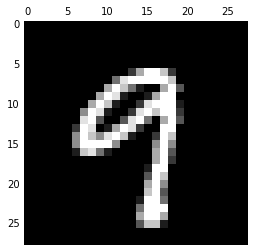

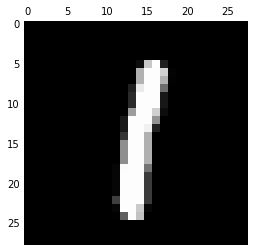

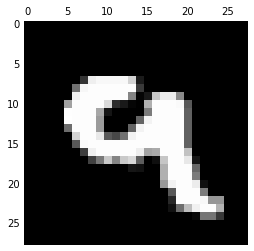

In [3]:
images = np.random.randint(mnist.train.images.shape[0], size=3)

for idx in images:
    img   = np.reshape(mnist.train.images[idx, :], (28, 28))
    plt.matshow(img, cmap=plt.get_cmap('gray'))

In [4]:
n_hidden_1 = 256 
n_hidden_2 = 128 
n_input    = 28 * 28
n_classes  = 10  

x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])


weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [5]:
def multilayer_perceptron(x, weights, biases):
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['h1']), biases['b1'])) 
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['h2']), biases['b2']))

    return tf.matmul(layer_2, weights['out']) + biases['out']

In [6]:
prediction = multilayer_perceptron(x, weights, biases)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(prediction, y)) 
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss) 

correct_predictions = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))    
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
tf.summary.scalar('accuracy', accuracy)

sess = tf.Session()

writer = tf.summary.FileWriter('/tmp/tf/', sess.graph)
merged = tf.summary.merge_all()

init = tf.global_variables_initializer()

In [7]:
epochs = 20
batch_size = 100
batch_count = int(mnist.train.num_examples / batch_size)

sess.run(init)

for epoch in range(epochs):
    for _ in range(batch_count):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
        
    summary, epoch_accuracy = sess.run([merged, accuracy], feed_dict={x: mnist.test.images, y: mnist.test.labels})
    writer.add_summary(summary, epoch + 1)

    print("Epoch: {:02d} / {}, Accuracy: {:.2f}%".format(epoch + 1, epochs, epoch_accuracy * 100))


writer.flush()
writer.close()

Epoch: 01 / 20, Accuracy: 79.87%
Epoch: 02 / 20, Accuracy: 86.41%
Epoch: 03 / 20, Accuracy: 88.78%
Epoch: 04 / 20, Accuracy: 90.42%
Epoch: 05 / 20, Accuracy: 91.42%
Epoch: 06 / 20, Accuracy: 92.08%
Epoch: 07 / 20, Accuracy: 92.67%
Epoch: 08 / 20, Accuracy: 92.92%
Epoch: 09 / 20, Accuracy: 93.01%
Epoch: 10 / 20, Accuracy: 93.70%
Epoch: 11 / 20, Accuracy: 94.10%
Epoch: 12 / 20, Accuracy: 94.20%
Epoch: 13 / 20, Accuracy: 94.17%
Epoch: 14 / 20, Accuracy: 94.46%
Epoch: 15 / 20, Accuracy: 94.57%
Epoch: 16 / 20, Accuracy: 94.59%
Epoch: 17 / 20, Accuracy: 94.67%
Epoch: 18 / 20, Accuracy: 94.88%
Epoch: 19 / 20, Accuracy: 94.90%
Epoch: 20 / 20, Accuracy: 94.84%
